In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import holidays
import calendar
import datetime

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
import optuna
from darts import TimeSeries
from darts.models import AutoARIMA, LightGBMModel

In [5]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(font_scale=1.25)

In [6]:
data = pd.read_csv("train.csv")

In [7]:
train = pd.DataFrame()
train["Unit"] = data["БЕ"]
train["Date"] = data["Дата транзакции"]
train["RUB"] = data["Сумма в RUB"]

In [8]:
train_0 = train[train["Unit"]==0][["Date", "RUB"]]
train_0.set_index(pd.to_datetime(train_0["Date"]), inplace=True)
train_0.drop(["Date"], inplace=True, axis=1)

train_1 = train[train["Unit"]==1][["Date", "RUB"]]
train_1.set_index(pd.to_datetime(train_1["Date"]), inplace=True)
train_1.drop(["Date"], inplace=True, axis=1)

train_2 = train[train["Unit"]==2][["Date", "RUB"]]
train_2.set_index(pd.to_datetime(train_2["Date"]), inplace=True)
train_2.drop(["Date"], inplace=True, axis=1)

train_3 = train[train["Unit"]==3][["Date", "RUB"]]
train_3.set_index(pd.to_datetime(train_3["Date"]), inplace=True)
train_3.drop(["Date"], inplace=True, axis=1)

train_4 = train[train["Unit"]==4][["Date", "RUB"]]
train_4.set_index(pd.to_datetime(train_4["Date"]), inplace=True)
train_4.drop(["Date"], inplace=True, axis=1)

train_5 = train[train["Unit"]==5][["Date", "RUB"]]
train_5.set_index(pd.to_datetime(train_5["Date"]), inplace=True)
train_5.drop(["Date"], inplace=True, axis=1)

train_6 = train[train["Unit"]==6][["Date", "RUB"]]
train_6.set_index(pd.to_datetime(train_6["Date"]), inplace=True)
train_6.drop(["Date"], inplace=True, axis=1)

In [9]:
train_5.tail()

,RUB
Date,
2020-11-25,-1.890154e+07
2020-12-09,-6.657158e+07
2020-12-16,-5.862773e+07
2020-12-23,-1.243114e+07
2020-12-30,-1.924510e+03


In [10]:
train_5_1d = train_5.resample('1D').sum()
train_5_1d = pd.concat([train_5_1d, pd.DataFrame([0], columns=["RUB"], index=[pd.to_datetime("2020-12-31")])])
train_5_1d.index.name = "Date"

In [11]:
train_5_1d.tail()

,RUB
Date,
2020-12-27,0.000000
2020-12-28,0.000000
2020-12-29,0.000000
2020-12-30,-1924.509554
2020-12-31,0.000000


<AxesSubplot:xlabel='Date'>

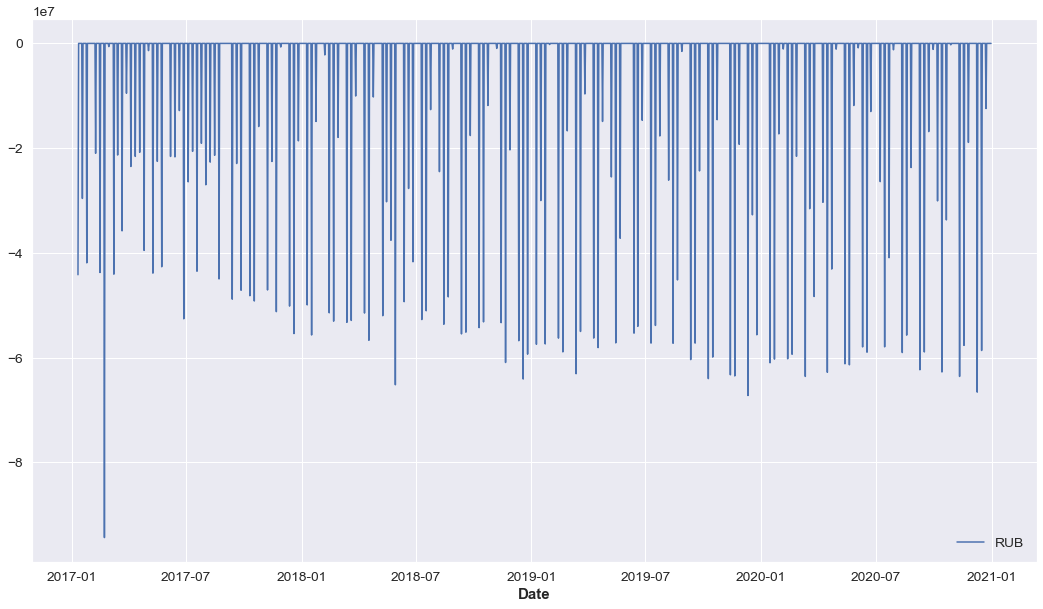

In [12]:
sns.lineplot(data=train_5_1d)

In [13]:
##############################################################################################################################################################################################

In [14]:
### Generalized valid data ###
# Данные, выданные к финалу - первый квартал 2021 года
data = pd.read_excel("1кв2021_1.xlsx")

In [15]:
# Работаем аналагично train
val = pd.DataFrame()
val["Unit"] = data["БЕ"]
val["Date"] = data["Расчет ликвидности - дата"]
val["RUB"] = data["Сумма в валюте транзакции"]

In [16]:
val_0 = val[val["Unit"]==0][["Date", "RUB"]]
val_0.set_index(pd.to_datetime(val_0["Date"], dayfirst=True), inplace=True)
val_0.drop("Date", inplace=True, axis=1)

val_1 = val[val["Unit"]==1][["Date", "RUB"]]
val_1.set_index(pd.to_datetime(val_1["Date"], dayfirst=True), inplace=True)
val_1.drop("Date", inplace=True, axis=1)

val_2 = val[val["Unit"]==2][["Date", "RUB"]]
val_2.set_index(pd.to_datetime(val_2["Date"], dayfirst=True), inplace=True)
val_2.drop("Date", inplace=True, axis=1)

val_3 = val[val["Unit"]==3][["Date", "RUB"]]
val_3.set_index(pd.to_datetime(val_3["Date"], dayfirst=True), inplace=True)
val_3.drop("Date", inplace=True, axis=1)

val_4 = val[val["Unit"]==4][["Date", "RUB"]]
val_4.set_index(pd.to_datetime(val_4["Date"], dayfirst=True), inplace=True)
val_4.drop("Date", inplace=True, axis=1)

val_5 = val[val["Unit"]==5][["Date", "RUB"]]
val_5.set_index(pd.to_datetime(val_5["Date"], dayfirst=True), inplace=True)
val_5.drop("Date", inplace=True, axis=1)

val_6 = val[val["Unit"]==6][["Date", "RUB"]]
val_6.set_index(pd.to_datetime(val_6["Date"], dayfirst=True), inplace=True)
val_6.drop("Date", inplace=True, axis=1)

<img src="https://miro.medium.com/max/1400/1*B1oKvhOuYoTdFEnwl8SEpg.png">

<img src="https://miro.medium.com/max/1400/1*P390TYkT_KUaTDBeWBO1Ig.png">

In [17]:
first_quarter = pd.DataFrame()
first_quarter.index = pd.date_range(start='1/1/2021', end='31/08/2021')
first_quarter["RUB"] = 0

val_0_1d = pd.DataFrame()
val_0_1d.index = pd.merge(val_0, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_0_1d.index.name = "Date"
val_0_1d["RUB"] = pd.merge(val_0, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_1_1d = pd.DataFrame()
val_1_1d.index = pd.merge(val_1, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_1_1d.index.name = "Date"
val_1_1d["RUB"] = pd.merge(val_1, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_2_1d = pd.DataFrame()
val_2_1d.index = pd.merge(val_2, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_2_1d.index.name = "Date"
val_2_1d["RUB"] = pd.merge(val_2, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_3_1d = pd.DataFrame()
val_3_1d.index = pd.merge(val_3, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_3_1d.index.name = "Date"
val_3_1d["RUB"] = pd.merge(val_3, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_4_1d = pd.DataFrame()
val_4_1d.index = pd.merge(val_4, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_4_1d.index.name = "Date"
val_4_1d["RUB"] = pd.merge(val_4, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_5_1d = pd.DataFrame()
val_5_1d.index = pd.merge(val_5, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_5_1d.index.name = "Date"
val_5_1d["RUB"] = pd.merge(val_5, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_6_1d = pd.DataFrame()
val_6_1d.index = pd.merge(val_6, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_6_1d.index.name = "Date"
val_6_1d["RUB"] = pd.merge(val_6, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

In [18]:
##############################################################################################################################################################################################

In [19]:
# Feature engineering
# Добавляем регрессоры
# Future covariates

In [20]:
def dayofweek(df):
    df["Dayofweek"] = df.index.dayofweek
    return df

In [21]:
def get_holidays(df):
    df["Holidays"] = pd.Series(df.index).apply(lambda x: holidays.CountryHoliday('RUS').get(x)).values
    df["Holidays"] = df["Holidays"].astype('bool').astype('int')
    return df

In [22]:
def number_of_week_in_year(df):
    df["Number_of_week_in_year"] = df.index.isocalendar().week
    df["Number_of_week_in_year"] = df["Number_of_week_in_year"].astype(int)
    return df

In [23]:
def number_of_week_in_month(df):
    def week_of_month(tgtdate):
        days_this_month = calendar.mdays[tgtdate.month]
        for i in range(1, days_this_month):
            d = datetime.datetime(tgtdate.year, tgtdate.month, i)
            if d.day - d.weekday() > 0:
                startdate = d
                break
        return (tgtdate - startdate).days //7 + 1

    df["Number_of_week_in_month"] = df.index.to_series().apply(week_of_month)
    return df

In [24]:
def number_of_day_in_month(df):
    df["Number_of_day_in_month"] = df.index.day
    return df

In [25]:
def number_of_day_in_year(df):
    df["Number_of_day_in_year"] = df.index.dayofyear
    return df

In [26]:
def get_month(df):
    df["Month"] = df.index.month
    return df

In [27]:
def get_season(df):
    df["Season"] = df.index.month%12 // 3 + 1
    return df

In [28]:
def payday(df, payday):
    df["Payday"] = 0 
    df.loc[df.index.day_name() == payday, "Payday"] = 1
    return df

In [29]:
(
    train_5_1d.pipe(dayofweek)
    .pipe(get_holidays)
    .pipe(number_of_week_in_year)
    .pipe(number_of_week_in_month)
    .pipe(number_of_day_in_month)
    .pipe(number_of_day_in_year)
    .pipe(get_month)
    .pipe(get_season)
    .pipe(payday, payday="Wednesday")
)

,RUB,Dayofweek,Holidays,Number_of_week_in_year,Number_of_week_in_month,Number_of_day_in_month,Number_of_day_in_year,Month,Season,Payday
Date,,,,,,,,,,
2017-01-11,-4.416300e+07,2,0,2,2,11,11,1,1,1
2017-01-12,0.000000e+00,3,0,2,2,12,12,1,1,0
2017-01-13,0.000000e+00,4,0,2,2,13,13,1,1,0
2017-01-14,0.000000e+00,5,0,2,2,14,14,1,1,0
2017-01-15,0.000000e+00,6,0,2,2,15,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.000000e+00,6,0,52,3,27,362,12,1,0
2020-12-28,0.000000e+00,0,0,53,4,28,363,12,1,0
2020-12-29,0.000000e+00,1,0,53,4,29,364,12,1,0


In [30]:
(
    val_5_1d.pipe(dayofweek)
    .pipe(get_holidays)
    .pipe(number_of_week_in_year)
    .pipe(number_of_week_in_month)
    .pipe(number_of_day_in_month)
    .pipe(number_of_day_in_year)
    .pipe(get_month)
    .pipe(get_season)
    .pipe(payday, payday="Wednesday")
)

,RUB,Dayofweek,Holidays,Number_of_week_in_year,Number_of_week_in_month,Number_of_day_in_month,Number_of_day_in_year,Month,Season,Payday
Date,,,,,,,,,,
2021-01-01,0.0,4,1,53,0,1,1,1,1,0
2021-01-02,0.0,5,1,53,0,2,2,1,1,0
2021-01-03,0.0,6,1,53,0,3,3,1,1,0
2021-01-04,0.0,0,1,1,1,4,4,1,1,0
2021-01-05,0.0,1,1,1,1,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-27,0.0,4,0,34,4,27,239,8,3,0
2021-08-28,0.0,5,0,34,4,28,240,8,3,0
2021-08-29,0.0,6,0,34,4,29,241,8,3,0


In [31]:
list(train_5_1d.columns.values)

['RUB',
 'Dayofweek',
 'Holidays',
 'Number_of_week_in_year',
 'Number_of_week_in_month',
 'Number_of_day_in_month',
 'Number_of_day_in_year',
 'Month',
 'Season',
 'Payday']

In [32]:
# Past covariates

In [33]:
# файл, содержащий информацию об контрагентах в разрезе БЕ №5

# Сумма документа - Сумма в документе оплаты в периоде
# % оплаты - Оплата в процентном соотношении
# Сумма оплачено - Оплата в денежном выражении
# Сумма оплачено с НДС - Оплата в денежном выражении с учетом НДС
# Дата документа - Дата выпуска счета на оплату
# Дата закрытия аванса - Дата проведения оплаты
# Дата постановки на оплату - Дата включения в календарь платежей Северстали
# Контрагент - № контрагента

data = pd.read_csv("Контрагенты по годам.csv")

In [34]:
# Чистка, подгонка
data.replace(to_replace={"17.02.1016":"2016-02-17 00:00:00"}, inplace=True)
data.replace(to_replace={"31.06.2016":"2016-05-31 00:00:00", "31.11.2016":"2016-10-31 00:00:00", "31.06.2017":"2017-05-31 00:00:00"}, inplace=True)
data.replace({"-95711.4357159999": np.nan, "90241.6106160001": np.nan, "без оплаты": np.nan, "переплата!!": np.nan}, inplace=True) 

In [35]:
contractor = pd.DataFrame()

contractor["Doc_date_op"] = pd.to_datetime(pd.to_datetime(data["дата докум."]).dt.date)
contractor["Doc_date_op"].fillna(pd.NaT, inplace=True)
contractor["Date_reg_prepay"] = pd.to_datetime(pd.to_datetime(data["Дата постановки на оплату (аванс)"]).dt.date)
contractor["Date_reg_prepay"].fillna(pd.NaT, inplace=True)
contractor["Doc_date_cl"] = pd.to_datetime(pd.to_datetime(data["дата докум.3"]).dt.date)
contractor["Doc_date_cl"].fillna(pd.NaT, inplace=True)
contractor["Date_prepay_cl"] = pd.to_datetime(pd.to_datetime(data["Дата закр. Аванса"]).dt.date)
contractor["Date_prepay_cl"].fillna(pd.NaT, inplace=True)
contractor["Date_reg_fin"] =  pd.to_datetime(pd.to_datetime(data["Дата постановки на оплату (оконч. платеж.)"]).dt.date)
contractor["Date_reg_fin"].fillna(pd.NaT, inplace=True)

contractor["Sum_doc_wo_VAT"] = data["сумма док.,без НДС"] # ???
contractor["Ratio"] = data["% оплаты"]
contractor["Sum_doc_wo_VAT2"] = data["сумма док.,без НДС2"]
contractor["Sum_paid_wo_VAT"] = data["сумма оплачено,без НДС"]
contractor["Sum_to_pay_with_prepay_wo_VAT"] = data["сумма к оплате с учетом аванса,без НДС"]

contractor["Sum_doc_VAT"] = data["сумма док.,с НДС"]
contractor["Sum_paid_VAT"] = data["сумма оплачено,с НДС "]
contractor["Sum_to_pay_with_prepay_VAT"] = data["сумма к оплате с учетом аванса,с НДС "]

contractor["Contractor"] = data["Контрагент"].astype(np.int8)

In [36]:
# Какой-то мусор в последней строке
contractor.drop(index=479, inplace=True) 

In [37]:
contractor

,Doc_date_op,Date_reg_prepay,Doc_date_cl,Date_prepay_cl,Date_reg_fin,Sum_doc_wo_VAT,Ratio,Sum_doc_wo_VAT2,Sum_paid_wo_VAT,Sum_to_pay_with_prepay_wo_VAT,Sum_doc_VAT,Sum_paid_VAT,Sum_to_pay_with_prepay_VAT,Contractor
0,2015-01-10,2015-01-28,2015-01-31,2015-02-25,2015-03-04,8.589579e+05,70.000000,1.401091e+06,6.012706e+05,7.998204e+05,1.653287e+06,7.094993e+05,9.437881e+05,3
1,2015-01-01,2015-02-11,2015-03-19,2015-02-25,2015-03-25,1.494709e+06,65.681947,1.342357e+06,9.817540e+05,3.606033e+05,1.583982e+06,1.158470e+06,4.255119e+05,1
2,2014-12-19,2015-01-21,2015-01-31,2015-02-25,2015-02-25,3.399202e+07,50.000000,3.481920e+07,1.699601e+07,1.782318e+07,4.108665e+07,2.005529e+07,2.103136e+07,2
3,2014-12-19,2015-01-21,2015-01-31,2015-02-25,2015-02-25,6.727360e+06,50.000000,7.850059e+06,3.363680e+06,4.486379e+06,9.263069e+06,3.969142e+06,5.293927e+06,2
4,2015-01-12,2015-01-13,2015-01-31,2015-02-26,NaT,1.638478e+07,100.000000,4.785992e+07,1.638478e+07,1.509036e+07,5.647471e+07,1.933405e+07,1.780662e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2021-02-25,2021-03-10,NaT,2021-04-30,NaT,1.572466e+06,50.000000,0.000000e+00,7.862332e+05,-7.862332e+05,0.000000e+00,9.434799e+05,-9.434799e+05,1
475,2021-02-19,2021-03-10,NaT,2021-04-30,NaT,4.076424e+07,50.000000,0.000000e+00,2.038212e+07,-2.038212e+07,0.000000e+00,2.445854e+07,-2.445854e+07,2
476,2021-02-19,2021-03-10,NaT,2021-04-30,NaT,9.121529e+06,50.000000,0.000000e+00,4.560764e+06,-4.560764e+06,0.000000e+00,5.472917e+06,-5.472917e+06,2
477,2021-02-25,2021-03-10,NaT,2021-03-31,NaT,2.586886e+07,100.000000,0.000000e+00,2.586886e+07,-5.173772e+07,0.000000e+00,3.104263e+07,-6.208527e+07,4


In [38]:
# Генерация новых признаков в количественном стиле для дат (кол-во документов на дату)
# Генерация новых признаков для значений транзакций

In [39]:
def is_Doc_date_op_VAT(df1, df2):
    df1["is_Doc_date_op"] = 0
    df1.loc[df1.index.isin(df2["Doc_date_op"]), "is_Doc_date_op"] = df2.loc[
        df2["Doc_date_op"].isin(df2.index)
    ].pivot_table(columns=["Doc_date_op"], aggfunc="size")

    df1["Sum_doc_VAT"] = 0
    df1.loc[df1.index.isin(df2["Doc_date_op"]), "Sum_doc_VAT"] = (
        df2.loc[df2["Doc_date_op"].isin(df1.index)]
        .pivot_table(columns=["Doc_date_op"], aggfunc="sum")
        .loc["Sum_doc_VAT"]
    )
    return df1

In [40]:
def is_Date_reg_prepay_VAT(df1, df2):
    df1["is_Date_reg_prepay"] = 0
    df1.loc[df1.index.isin(df2["Date_reg_prepay"]), "is_Date_reg_prepay"] = df2.loc[
        df2["Date_reg_prepay"].isin(df2.index)
    ].pivot_table(columns=["Date_reg_prepay"], aggfunc="size")

    df1["Sum_paid_VAT"] = 0
    df1.loc[df1.index.isin(df2["Date_reg_prepay"]), "Sum_paid_VAT"] = (
        df2.loc[df2["Date_reg_prepay"].isin(df1.index)]
        .pivot_table(columns=["Date_reg_prepay"], aggfunc="sum")
        .loc["Sum_paid_VAT"]
    )
    return df1

In [41]:
def is_Doc_date_cl(df1, df2):
    df1["is_Doc_date_cl"] = 0
    df1.loc[
        df1.index.isin(df2["Doc_date_cl"]), "is_Doc_date_cl"
    ] = df2.loc[df2["Doc_date_cl"].isin(df1.index)].pivot_table(
        columns=["Doc_date_cl"], aggfunc="size"
    )
    return df1

In [42]:
def is_Date_reg_fin_VAT(df1, df2):
    df1["is_Date_reg_fin"] = 0
    df1.loc[
    df1.index.isin(df2["Date_reg_fin"]), "is_Date_reg_fin"
    ] = df2.loc[df2["Date_reg_fin"].isin(df1.index)].pivot_table(
    columns=["Date_reg_fin"], aggfunc="size"
    )

    df1["Sum_to_pay_with_prepay_VAT"] = 0
    df1.loc[
    df1.index.isin(df2["Date_reg_fin"]), "Sum_to_pay_with_prepay_VAT"
    ] = (
    df2.loc[df2["Date_reg_fin"].isin(df1.index)]
    .pivot_table(columns=["Date_reg_fin"], aggfunc="sum")
    .loc["Sum_to_pay_with_prepay_VAT"]
    )
    return df1

In [43]:
(
    train_5_1d.pipe(is_Doc_date_op_VAT, df2=contractor)
    .pipe(is_Date_reg_prepay_VAT, df2=contractor)
    .pipe(is_Doc_date_cl, df2=contractor)
    .pipe(is_Date_reg_fin_VAT, df2=contractor)
)
train_5_1d.fillna(0, inplace=True)

In [44]:
(
    val_5_1d.pipe(is_Doc_date_op_VAT, df2=contractor)
    .pipe(is_Date_reg_prepay_VAT, df2=contractor)
    .pipe(is_Doc_date_cl, df2=contractor)
    .pipe(is_Date_reg_fin_VAT, df2=contractor)
)
val_5_1d.fillna(0, inplace=True)

In [45]:
##############################################################################################################################################################################################

In [46]:
# Darts модели

In [47]:
train_5_1d_reindex = train_5_1d["RUB"].reset_index(inplace=False)
train_5_1d_covariates = train_5_1d.drop("RUB", inplace=False, axis=1).reset_index()

val_5_1d_reindex = val_5_1d.loc["2021-01-01":"2021-03-31","RUB"].reset_index(inplace=False)
val_5_1d_covariates = val_5_1d.drop("RUB", inplace=False, axis=1).reset_index()

In [48]:
total_5_1d = pd.concat([train_5_1d, val_5_1d.loc["2021-01-01":"2021-03-31"]])
total_5_1d_reindex = total_5_1d["RUB"].reset_index(inplace=False)

In [49]:
series_1d_total = TimeSeries.from_dataframe(total_5_1d_reindex, time_col='Date', value_cols='RUB', freq='1d', fill_missing_dates=True)

In [50]:
covariates = pd.concat([train_5_1d_covariates, val_5_1d_covariates])

In [51]:
covariates[covariates["Date"]<="2021-03-31"]

,Date,Dayofweek,Holidays,Number_of_week_in_year,Number_of_week_in_month,Number_of_day_in_month,Number_of_day_in_year,Month,Season,Payday,is_Doc_date_op,Sum_doc_VAT,is_Date_reg_prepay,Sum_paid_VAT,is_Doc_date_cl,is_Date_reg_fin,Sum_to_pay_with_prepay_VAT
0,2017-01-11,2,0,2,2,11,11,1,1,1,0.0,0.0,0.0,4.416300e+07,0,0,0.0
1,2017-01-12,3,0,2,2,12,12,1,1,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
2,2017-01-13,4,0,2,2,13,13,1,1,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
3,2017-01-14,5,0,2,2,14,14,1,1,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
4,2017-01-15,6,0,2,2,15,15,1,1,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-03-27,5,0,12,4,27,86,3,2,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
86,2021-03-28,6,0,12,4,28,87,3,2,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
87,2021-03-29,0,0,13,5,29,88,3,2,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0
88,2021-03-30,1,0,13,5,30,89,3,2,0,0.0,0.0,0.0,0.000000e+00,0,0,0.0


In [52]:
series_1d_train = TimeSeries.from_dataframe(train_5_1d_reindex, time_col='Date', value_cols='RUB', freq='1d', fill_missing_dates=True)
series_1d_val = TimeSeries.from_dataframe(val_5_1d_reindex, time_col='Date', value_cols='RUB', freq='1d', fill_missing_dates=True)

In [53]:
series_1d_future_covariates = TimeSeries.from_dataframe(
    covariates,
    time_col="Date",
    value_cols=[
        "Dayofweek",
        "Holidays",
        "Number_of_week_in_year",
        "Number_of_week_in_month",
        "Number_of_day_in_month",
        "Number_of_day_in_year",
        "Month",
        "Season",
        "Payday",
    ],
    freq="1d",
    fill_missing_dates=True,
)

In [54]:
series_1d_past_covariates = TimeSeries.from_dataframe(
    covariates[covariates["Date"]<="2021-03-31"],
    time_col="Date",
    value_cols=[
        "is_Doc_date_op",
        "Sum_doc_VAT",
        "is_Date_reg_prepay",
        "Sum_paid_VAT",
        "is_Doc_date_cl",
        "is_Date_reg_fin",
        "Sum_to_pay_with_prepay_VAT",
    ],
    freq="1d",
    fill_missing_dates=True,
)

In [55]:
train_1d_split, local_val_1d_split = series_1d_train.split_before(0.80)
val_1d_split = series_1d_val

In [56]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [98]:
def objective_LGB(trial):

    model1d = LightGBMModel(
        lags=None,
        lags_future_covariates=(61, 31),
        lags_past_covariates=[-91, -92, -93, -94, -95, -96, -97],
        output_chunk_length=1,
        verbose=-1,
        metric="mae",
        n_estimators=1000,
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1.0, log=True),
        lambda_l1=trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        lambda_l2=trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        min_gain_to_split=trial.suggest_float("min_gain_to_split", 0, 10.0),
        num_leaves=trial.suggest_int("num_leaves", 8, 256),
        feature_fraction=trial.suggest_uniform("feature_fraction", 0.0001, 1.0),
        bagging_fraction=trial.suggest_uniform("bagging_fraction", 0.0001, 1.0),
        bagging_freq=trial.suggest_int("bagging_freq", 0, 30),
        min_child_samples=trial.suggest_int("min_child_samples", 1, 100),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 3, 100),
        feature_pre_filter=False
    )  
 
    model1d.fit(train_1d_split, future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates) #
    prediction1d = model1d.predict(n=len(local_val_1d_split), future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates) #
    fixed_prediction1d = prediction1d.pd_dataframe() 
    fixed_prediction1d[fixed_prediction1d["RUB"] > 0] = 0
    local_val = mean_absolute_error(local_val_1d_split.pd_dataframe(), fixed_prediction1d)
    
    model1d.fit(series_1d_train, future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates) #
    prediction1d = model1d.predict(n=len(val_1d_split), future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates) #
    fixed_prediction1d = prediction1d.pd_dataframe()
    fixed_prediction1d[fixed_prediction1d["RUB"] > 0] = 0
    global_val = mean_absolute_error(val_1d_split.pd_dataframe(), fixed_prediction1d)
    
    val = np.mean([local_val, global_val])

    trial.set_user_attr("Valid_score", val)

    print(f"MAE: {val}\n")

    return val

In [99]:
study_LGB = optuna.create_study(direction="minimize")
study_LGB.optimize(objective_LGB, n_trials=100, gc_after_trial=True) #300 - можно и больше, но как показывает лог, этого более чем достаточно

[LightGBM] [Warning] feature_fraction is set=0.7528605094643624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7528605094643624
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] min_gain_to_split is set=8.8761722294178, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.8761722294178
[LightGBM] [Warning] lambda_l1 is set=0.00016825623357029585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016825623357029585
[LightGBM] [Warning] bagging_fraction is set=0.3743035130086958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3743035130086958
[LightGBM] [Warning] lambda_l2 is set=7.4898416997896e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.4898416997896e-08
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set

In [100]:
# С past_covariates 15 - не для финального предикта. У нас данных не хватает из contractor сделать предикт на 91 день вперед
# lags_future_covariates=(61, 31),
# lags_past_covariates=15,
# output_chunk_length=1,
# {'learning_rate': 0.008225829226359706,
#  'lambda_l1': 0.44987604496084743,
#  'lambda_l2': 4.046587348188189e-05,
#  'min_gain_to_split': 7.183212696019054,
#  'num_leaves': 228,
#  'feature_fraction': 0.7706743818118095,
#  'bagging_fraction': 0.5617777327735536,
#  'bagging_freq': 5,
#  'min_child_samples': 80,
#  'min_data_in_leaf': 10}

# С past_cpvariates [-91, -92, -93, -94, -95, -96, -97], - взял 7 дней. Можно больше, можно меньше.
# lags_future_covariates=(61, 31),
# lags_past_covariates=[-91, -92, -93, -94, -95, -96, -97],
# output_chunk_length=1,
# {'learning_rate': 0.006290431289485111,
#  'lambda_l1': 9.996845228922789e-06,
#  'lambda_l2': 2.3664028132052588e-05,
#  'min_gain_to_split': 2.1950101167200535,
#  'num_leaves': 141,
#  'feature_fraction': 0.5320260161044131,
#  'bagging_fraction': 0.7921485249957791,
#  'bagging_freq': 2,
#  'min_child_samples': 88,
#  'min_data_in_leaf': 13}

# Без past_covariates

# {'learning_rate': 0.005398628757196157,
#  'lambda_l1': 5.416807523908855e-07,
#  'lambda_l2': 0.033574380573066165,
#  'min_gain_to_split': 3.6764889704583608,
#  'num_leaves': 158,
#  'feature_fraction': 0.9462545725116538,
#  'bagging_fraction': 0.731847210024567,
#  'bagging_freq': 5,
#  'min_child_samples': 15,
#  'min_data_in_leaf': 18}

study_LGB.best_params

{'learning_rate': 0.005398628757196157,
 'lambda_l1': 5.416807523908855e-07,
 'lambda_l2': 0.033574380573066165,
 'min_gain_to_split': 3.6764889704583608,
 'num_leaves': 158,
 'feature_fraction': 0.9462545725116538,
 'bagging_fraction': 0.731847210024567,
 'bagging_freq': 5,
 'min_child_samples': 15,
 'min_data_in_leaf': 18}

In [61]:
model1d = LightGBMModel(
        lags=None,
        lags_future_covariates=(61, 31),
        lags_past_covariates=[-91, -92, -93, -94, -95, -96, -97],
        output_chunk_length=1,
        verbose=-1,
        metric="mae",
        n_estimators=1000,
        learning_rate= 0.006290431289485111,
        lambda_l1= 9.996845228922789e-06,
        lambda_l2= 2.3664028132052588e-05,
        min_gain_to_split= 2.1950101167200535,
        num_leaves= 141,
        feature_fraction= 0.5320260161044131,
        bagging_fraction= 0.7921485249957791,
        bagging_freq= 2,
        min_child_samples= 88,
        min_data_in_leaf= 13,
    
        # learning_rate=study_LGB.best_params["learning_rate"],
        # lambda_l1=study_LGB.best_params["lambda_l1"],
        # lambda_l2=study_LGB.best_params["lambda_l2"],
        # min_gain_to_split=study_LGB.best_params["min_gain_to_split"],
        # num_leaves=study_LGB.best_params["num_leaves"],
        # feature_fraction=study_LGB.best_params["feature_fraction"],
        # bagging_fraction=study_LGB.best_params["bagging_fraction"],
        # bagging_freq=study_LGB.best_params["bagging_freq"],
        # min_child_samples=study_LGB.best_params["min_child_samples"],
        # min_data_in_leaf=study_LGB.best_params["min_data_in_leaf"],
        # feature_pre_filter=False
    )  
model1d.fit(series_1d_train, future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates) #past_covariates=series_1d_past_covariates
prediction1d = model1d.predict(n=90, future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates) #past_covariates=series_1d_past_covariates

df_prediction1d = prediction1d.pd_dataframe()
df_prediction1d[df_prediction1d["RUB"]>0] = 0

[LightGBM] [Warning] feature_fraction is set=0.5320260161044131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5320260161044131
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=88 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=2.1950101167200535, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.1950101167200535
[LightGBM] [Warning] lambda_l1 is set=9.996845228922789e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.996845228922789e-06
[LightGBM] [Warning] bagging_fraction is set=0.7921485249957791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7921485249957791
[LightGBM] [Warning] lambda_l2 is set=2.3664028132052588e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3664028132052588e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


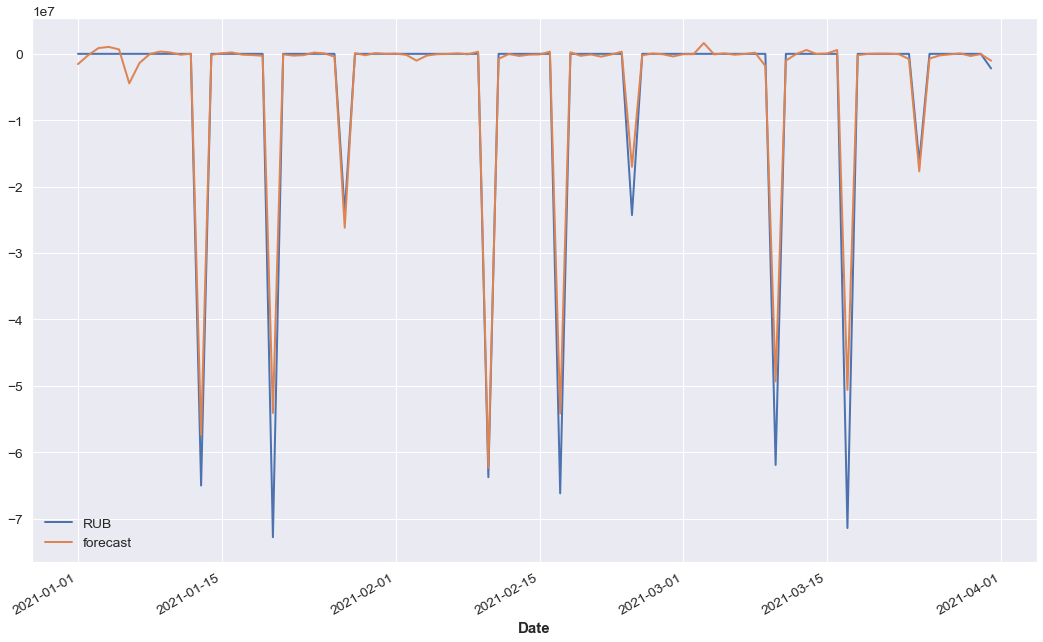

In [62]:
series_1d_val.plot()
prediction1d.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [63]:
# 1169447.4482717093 lags_past_covariates=[-91, -92, -93, -94, -95, -96, -97]
# 1423041.120586805 - без past_covariates
mean_absolute_error(val_5_1d_reindex["RUB"], df_prediction1d["RUB"])

1169447.4482717093

In [64]:
val_df = pd.DataFrame()
val_df.index = df_prediction1d["RUB"].index
val_df["y"] = val_5_1d_reindex["RUB"].values
val_df["yhat"] = (df_prediction1d["RUB"])

In [65]:
BU5_group_stage = pd.read_csv("train_5_ans_ts.csv", usecols=[1,2])
BU5_group_stage.set_index("Дата транзакции", inplace=True)
BU5_group_stage.index.name = "Date"

In [66]:
val_df["yhat_groupstage"] = BU5_group_stage.loc[:"2021-03-31", "Сумма в RUB"].values

In [67]:
BU5_group_stage.loc[:"2021-03-31", "Сумма в RUB"]

Date
2021-01-01   -228103.899810
2021-01-02    -29344.753410
2021-01-03   -171963.177465
2021-01-04   -245048.470228
2021-01-05         0.000000
                  ...      
2021-03-27         0.000000
2021-03-28     -3223.646109
2021-03-29         0.000000
2021-03-30    -30304.458602
2021-03-31         0.000000
Name: Сумма в RUB, Length: 90, dtype: float64

In [68]:
val_df

,y,yhat,yhat_groupstage
Date,,,
2021-01-01,0.000000e+00,-1.545193e+06,-228103.899810
2021-01-02,0.000000e+00,-2.009284e+05,-29344.753410
2021-01-03,0.000000e+00,0.000000e+00,-171963.177465
2021-01-04,0.000000e+00,0.000000e+00,-245048.470228
2021-01-05,0.000000e+00,0.000000e+00,0.000000
...,...,...,...
2021-03-27,0.000000e+00,-7.844852e+04,0.000000
2021-03-28,0.000000e+00,0.000000e+00,-3223.646109
2021-03-29,0.000000e+00,-3.240999e+05,0.000000


<AxesSubplot:xlabel='Date'>

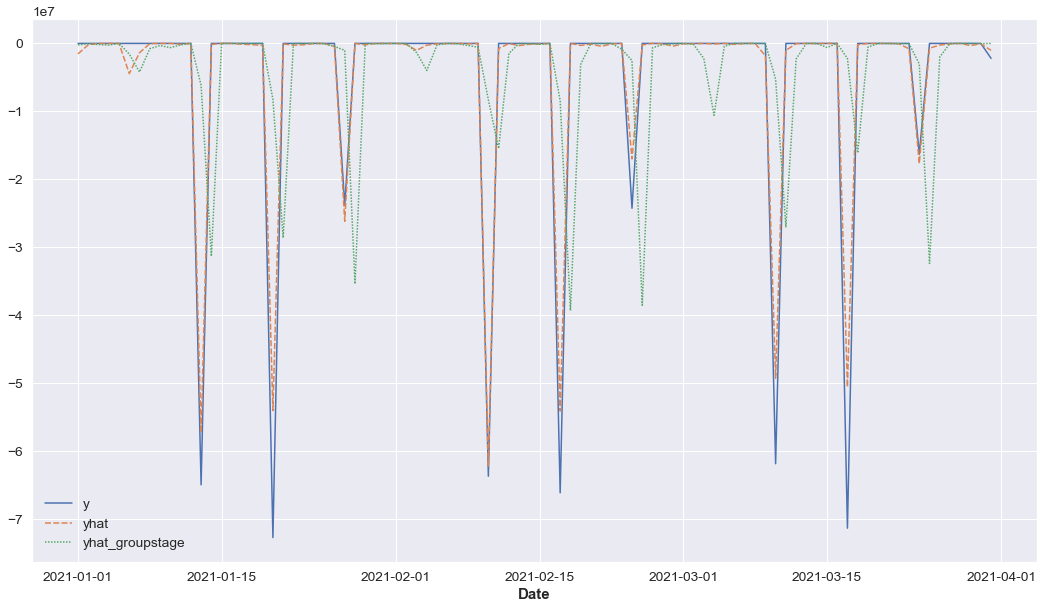

In [69]:
sns.lineplot(data=val_df)

In [70]:
mean_absolute_error(val_5_1d_reindex["RUB"], val_df["yhat_groupstage"])

8087446.632996785

In [95]:
##############################################################################################################################################################################################

In [96]:
# Refit на total

In [71]:
model1d = LightGBMModel(
        lags=None,
        lags_future_covariates=(61, 31),
        lags_past_covariates=[-91, -92, -93, -94, -95, -96, -97],
        output_chunk_length=1,
        verbose=-1,
        metric="mae",
        n_estimators=1000,
        learning_rate= 0.006290431289485111,
        lambda_l1= 9.996845228922789e-06,
        lambda_l2= 2.3664028132052588e-05,
        min_gain_to_split= 2.1950101167200535,
        num_leaves= 141,
        feature_fraction= 0.5320260161044131,
        bagging_fraction= 0.7921485249957791,
        bagging_freq= 2,
        min_child_samples= 88,
        min_data_in_leaf= 13,
    ) 
model1d.fit(series_1d_total, future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates)
prediction1d_total = model1d.predict(n=91, future_covariates=series_1d_future_covariates, past_covariates=series_1d_past_covariates)

df_prediction1d_total = prediction1d_total.pd_dataframe()
df_prediction1d_total[df_prediction1d_total["RUB"]>0] = 0

[LightGBM] [Warning] feature_fraction is set=0.5320260161044131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5320260161044131
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=88 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=2.1950101167200535, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.1950101167200535
[LightGBM] [Warning] lambda_l1 is set=9.996845228922789e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.996845228922789e-06
[LightGBM] [Warning] bagging_fraction is set=0.7921485249957791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7921485249957791
[LightGBM] [Warning] lambda_l2 is set=2.3664028132052588e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3664028132052588e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [73]:
#Собираем предикт вместе
train_5_ans_play_off = pd.DataFrame()
train_5_ans_play_off["Дата транзакции"] = pd.date_range(start="2021-04-01", end="2021-06-30", freq="1D")
train_5_ans_play_off["Сумма в RUB"] = (df_prediction1d_total["RUB"]).values
train_5_ans_play_off["Сумма в RUB"] = train_5_ans_play_off["Сумма в RUB"].groupby(train_5_ans_play_off["Дата транзакции"].dt.month).cumsum().values

train_5_ans_play_off["Месяц"] = train_5_ans_play_off["Дата транзакции"].dt.month
train_5_ans_play_off["БЕ"] = 5


In [74]:
train_5_ans_play_off

,Дата транзакции,Сумма в RUB,Месяц,БЕ
0,2021-04-01,-4.758615e+05,4,5
1,2021-04-02,-5.270986e+05,4,5
2,2021-04-03,-5.352627e+05,4,5
3,2021-04-04,-5.352627e+05,4,5
4,2021-04-05,-5.352627e+05,4,5
...,...,...,...,...
86,2021-06-26,-1.065065e+08,6,5
87,2021-06-27,-1.065326e+08,6,5
88,2021-06-28,-1.069350e+08,6,5
89,2021-06-29,-1.069796e+08,6,5


In [75]:
train_5_ans_play_off.to_csv("train_5_ans_play_off.csv")